In [1]:
import pandas as pd
import numpy as np 
import datetime 
from pandas.plotting._matplotlib import converter 
converter.register() 
from datetime import date
from datetime import timedelta 
import matplotlib.pyplot as plt 

In [2]:
#importing excel file and removing rows with null values 
df = pd.read_excel('PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
#df.columns.str.replace(' ', '')
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])
df = df.dropna(axis=0, subset=['Ship-to-Location'])

In [3]:
df.replace(to_replace = [ "Winthrop", "Brooklyn - Industry City", "Tisch"], value = "Stored", inplace=True)
df.replace(to_replace = ["Science Building", "FGP", "Bethpage", "360 Park Ave ", "Brooklyn - FHC", "Main Campus ", "Greenberg", "Brooklyn - Lutheran", "Cobble Hill", "700 Hicksville Road", "Cancer Center", "Fulton ", "LOH"], value = "Sent", inplace=True)
#df.loc[df['Ship-to-Location'].isin(storage_sites), 'Ship-to-Location'] = "Stored"
#df.loc[~df['Ship-to-Location'].isin(storage_sites), 'Ship-to-Location'] = "Sent"


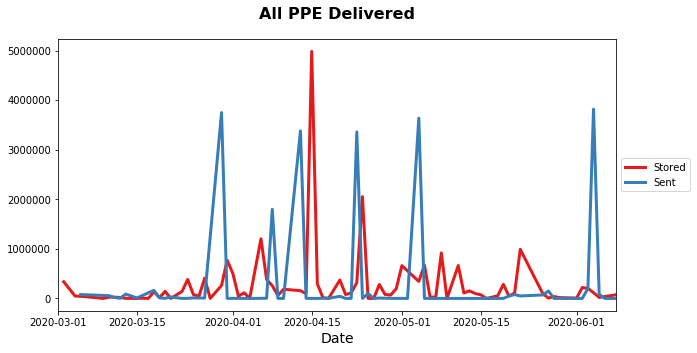

In [4]:
df_groups = df.groupby(['Ship-to-Location'])
locations = ["Stored", "Sent"]

stored_sent_df = pd.DataFrame()

for this_location in locations:
    dates = df_groups.get_group(this_location)['Estimated Delivery Date'].unique()
    dates_label = this_location + 'DeliveryDate'
    amnt_label = this_location + 'Amnt'
    
    
    count = 0
    for each_day in dates:
        this_group = df_groups.get_group(this_location)
        day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
        stored_sent_df.at[count, dates_label] = each_day
        stored_sent_df.at[count, amnt_label] = day_value
        count += 1
stored_sent_df.to_excel('all.xlsx')

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
palette = plt.get_cmap('Set1')
    
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])

num = 0
for this_location in locations:
    plt.title('All PPE Delivered', fontsize=16, pad=20, fontweight='bold')
    ax.plot(this_location + 'DeliveryDate', this_location + 'Amnt', data=stored_sent_df, color=palette(num), linewidth=3, label= this_location)
    num += 1
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [5]:
#separating storage sites

#importing excel file and removing rows with null values 
df = pd.read_excel('PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
#df.columns.str.replace(' ', '')
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])
df = df.dropna(axis=0, subset=['Ship-to-Location'])

In [6]:
#df.replace(to_replace = ["Winthrop", "Brooklyn - Industry City", "Tisch"], value = "Stored", inplace=True)
df.replace(to_replace = ["Science Building", "FGP", "Bethpage", "360 Park Ave ", "Brooklyn - FHC", "Main Campus ", "Greenberg", "Brooklyn - Lutheran", "Cobble Hill", "700 Hicksville Road", "Cancer Center", "Fulton ", "LOH"], value = "Sent", inplace=True)

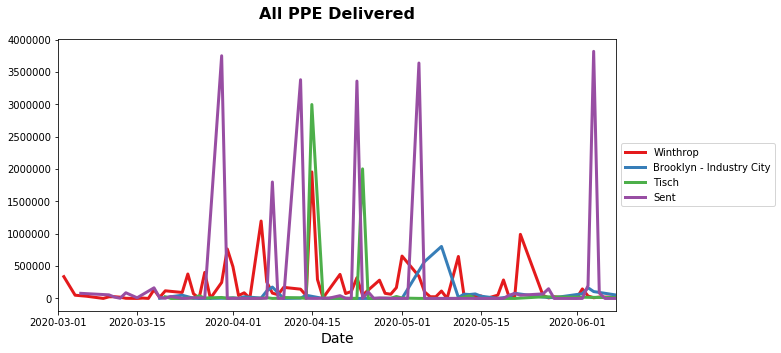

In [7]:
df_groups = df.groupby(['Ship-to-Location'])
locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

stored_sent_df = pd.DataFrame()

for this_location in locations:
    dates = df_groups.get_group(this_location)['Estimated Delivery Date'].unique()
    dates_label = this_location + 'DeliveryDate'
    amnt_label = this_location + 'Amnt'
    
    
    count = 0
    for each_day in dates:
        this_group = df_groups.get_group(this_location)
        day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
        stored_sent_df.at[count, dates_label] = each_day
        stored_sent_df.at[count, amnt_label] = day_value
        count += 1
stored_sent_df.to_excel('all.xlsx')

#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
palette = plt.get_cmap('Set1')
    
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])

num = 0
for this_location in locations:
    plt.title('All PPE Delivered', fontsize=16, pad=20, fontweight='bold')
    ax.plot(this_location + 'DeliveryDate', this_location + 'Amnt', data=stored_sent_df, color=palette(num), linewidth=3, label= this_location)
    num += 1
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



In [8]:
#separating ppe 
#importing excel file and removing rows with null values 
df = pd.read_excel('PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
#df.columns.str.replace(' ', '')
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])
df = df.dropna(axis=0, subset=['Ship-to-Location'])

    

In [9]:
#df.replace(to_replace = ["Winthrop", "Brooklyn - Industry City", "Tisch"], value = "Stored", inplace=True)
df.replace(to_replace = ["Science Building", "FGP", "Bethpage", "360 Park Ave ", "Brooklyn - FHC", "Main Campus ", "Greenberg", "Brooklyn - Lutheran", "Cobble Hill", "700 Hicksville Road", "Cancer Center", "Fulton ", "LOH"], value = "Sent", inplace=True)

In [11]:
Sent_ppe = ((df.groupby('Ship-to-Location')).get_group('Sent'))['Product Category'].unique()
Winthrop_ppe = ((df.groupby('Ship-to-Location')).get_group('Winthrop'))['Product Category'].unique()
Brooklyn_ppe = ((df.groupby('Ship-to-Location')).get_group('Brooklyn - Industry City'))['Product Category'].unique()
Tisch_ppe = ((df.groupby('Ship-to-Location')).get_group('Tisch'))['Product Category'].unique()

loc_ppe = [Sent_ppe, Winthrop_ppe, Brooklyn_ppe, Tisch_ppe]

common_ppe = []
for this_ppe_series in loc_ppe: 
    for this_ppe in this_ppe_series: 
        if this_ppe in Sent_ppe and ((this_ppe in Winthrop_ppe) or (this_ppe in Brooklyn_ppe) or (this_ppe in Tisch_ppe)): 
            if not (this_ppe in common_ppe): 
                common_ppe.append(this_ppe)


    


In [12]:
common_ppe1 = ['IV - Start Kit', 'Mask - Procedure Ear Loop', 'Gloves', 'Wipes - Quat', 'Coveralls', 'Shoe Covers', 'Gowns - Isolation', 'Bouffant Cap', 'Misc. Supplies', 'Hand Sanitizer ≤ 2.0 oz.', 'Collection Kit', 'EDS / Building Services']

In [13]:
common_ppe2 = ['Hand Sanitizer > 8 oz.', 'Ventilator Consumable - Filter', 'Fit Testing Kit', 'Rental Equipment', 'aScope', 'Media', 'Resuscitator Bag', 'Gowns - Other', 'Sterile Water (1,000 mL)', 'Pulse Ox', 'Stethescope - Single Head']

In [14]:
common_ppe3 = ['Mask - Surgical', 'Disposable Lab Coats', 'Lab Equipment ', 'IV Pump System', 'Hemodialysis Kit', 'Gowns - Reusable', 'Dialysis - Solutions', 'Dialysis - Peritoneal Catheter', 'Dialysis - Accessories', 'Dialysis - Scale', 'aScope - Accessory']

In [15]:
common_ppe4 = ['Ventilator Consumable - Humidifier', 'Ventilator Consumable - Adapter', 'Testing Supplies', 'Dialysis - Trocar', 'Fluid Delivery Set', 'PD Kit', 'Dialysis - Test Strips', 'Blood Sampling Kit']

In [16]:
common_ppe5 = ['Ventilator Consumable - Mask', 'Ventilator Consumable - Circuit', 'Ventilator Consumable - Line', 'Vent System', 'Ventilator Consumable - Cannula']

In [17]:
common_ppe6 = ['Ventilator Consumable - Cannula', 'Sterile Water (2L)', 'Mask - Oxygen', 'Dialysis - Disinfectant', 'Dialysis - Repair Kit', 'Antibiotics', 'Bleach ', 'Thermometer - Infrared', 'Hand Sanitizer 8 oz.', 'Ventilator Consumable - Peep Valve', 'HEPA Filter']

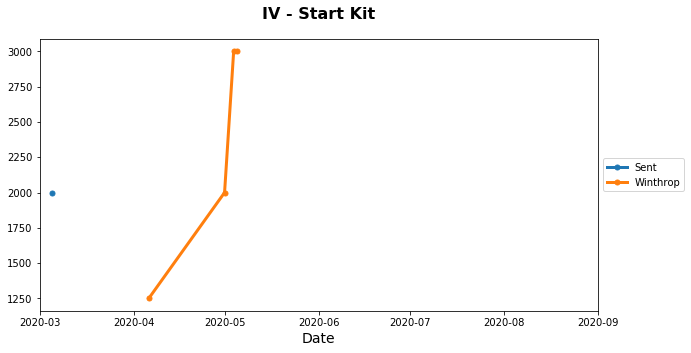

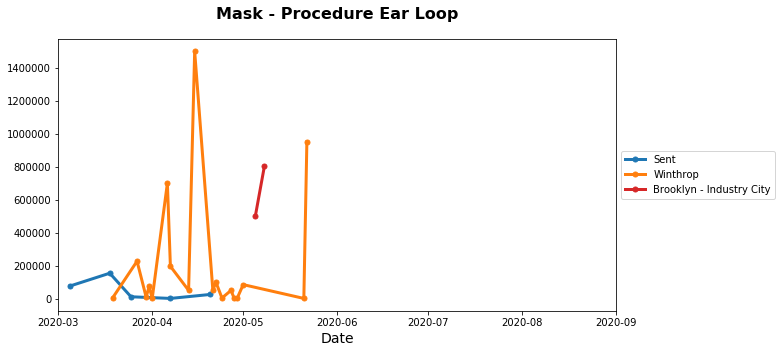

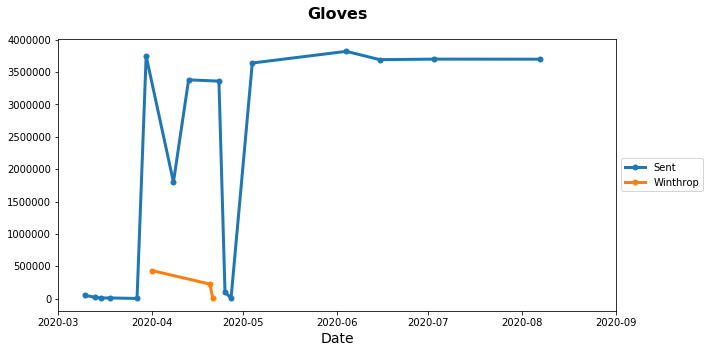

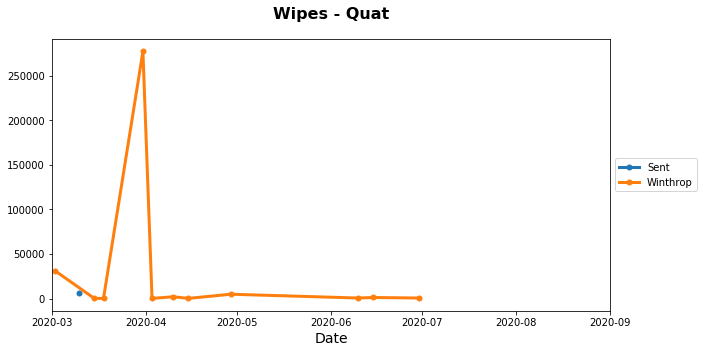

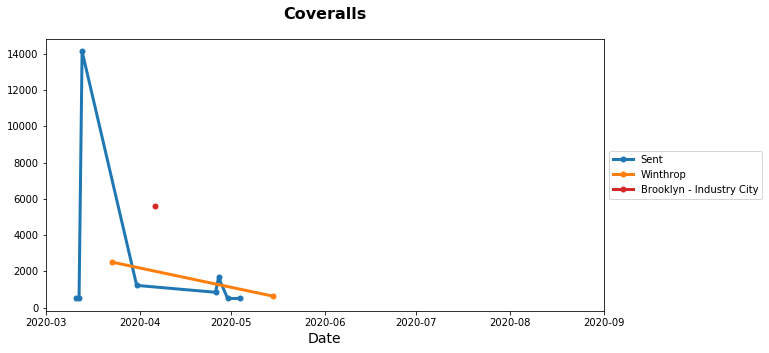

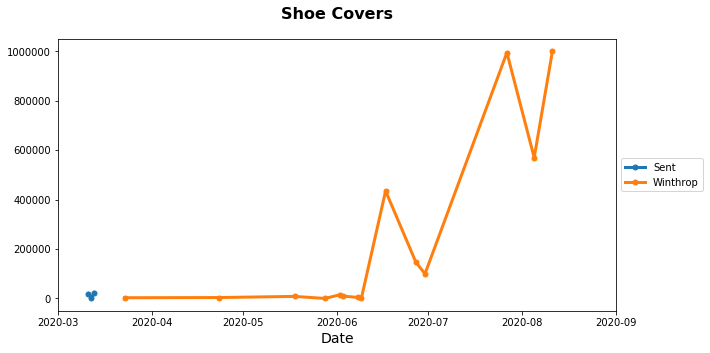

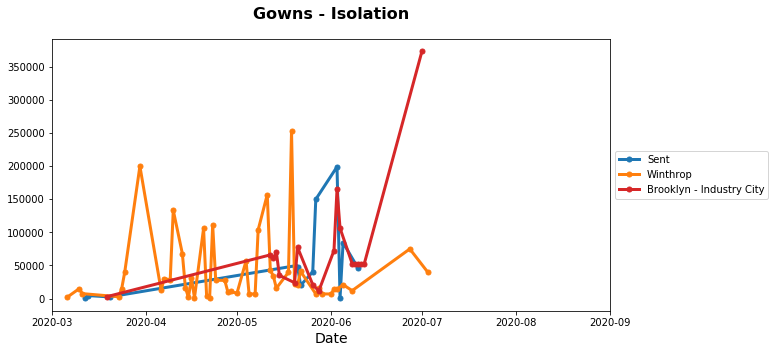

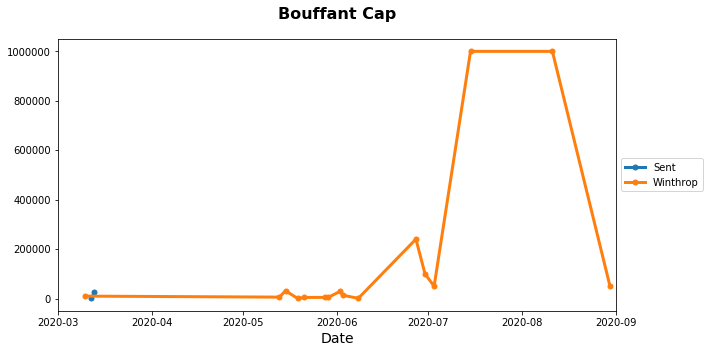

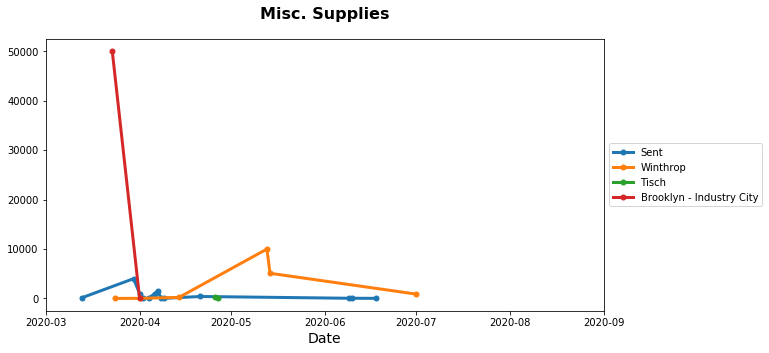

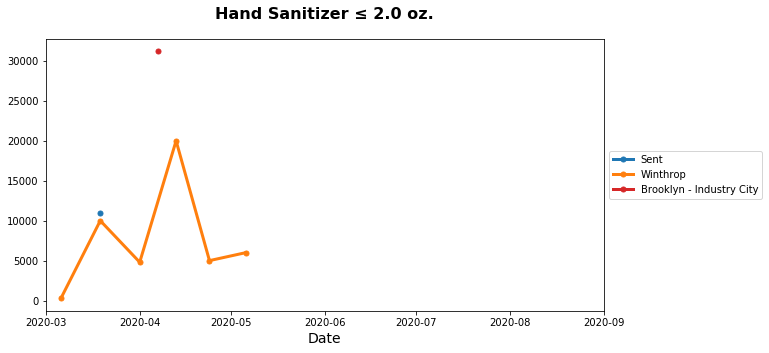

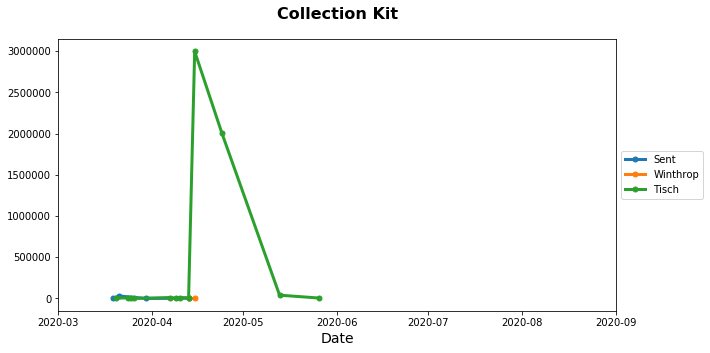

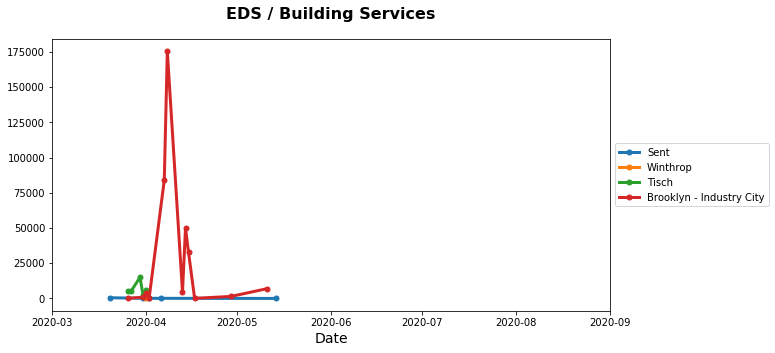

In [18]:
for this_ppe in common_ppe1:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 9, 1)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

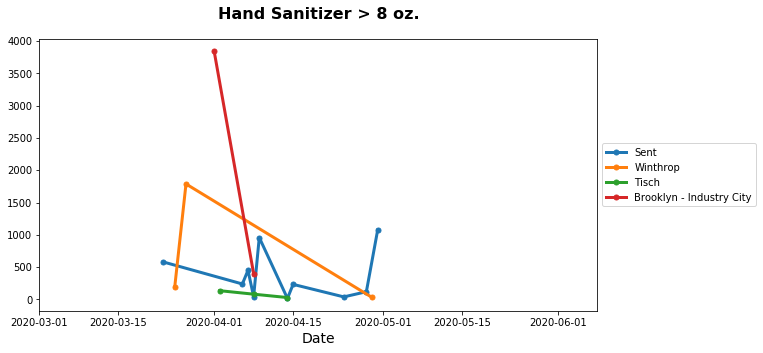

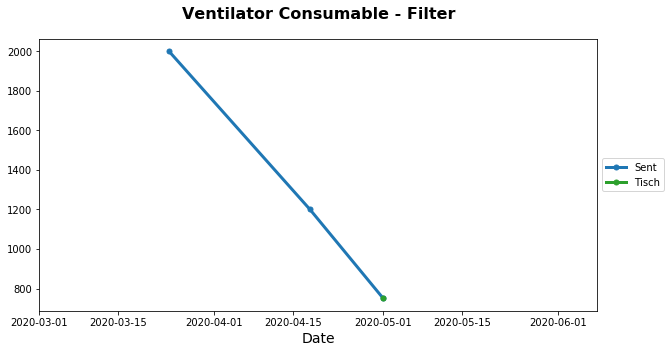

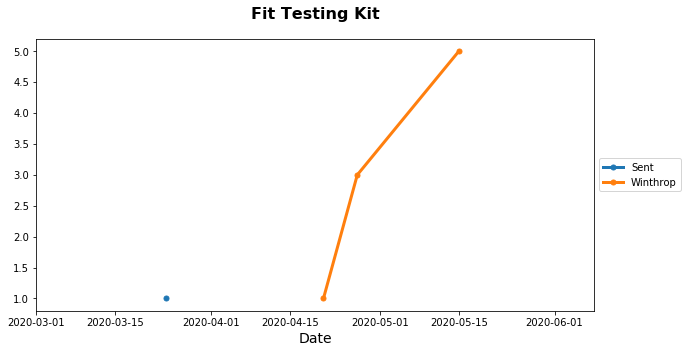

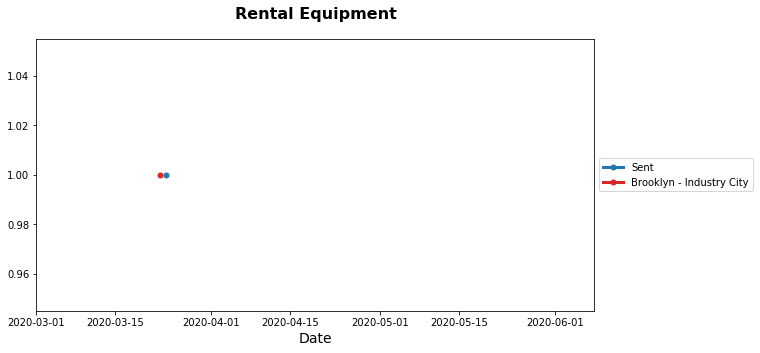

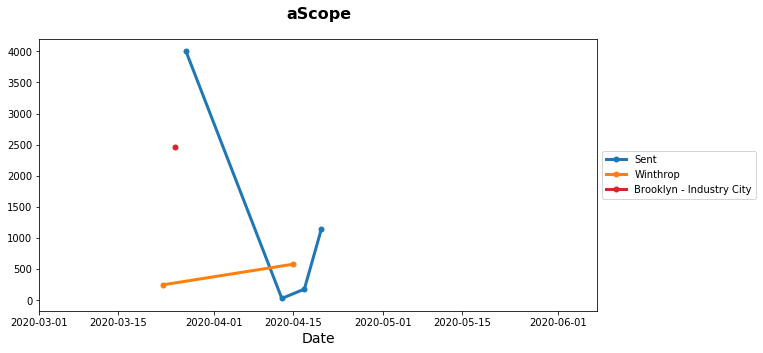

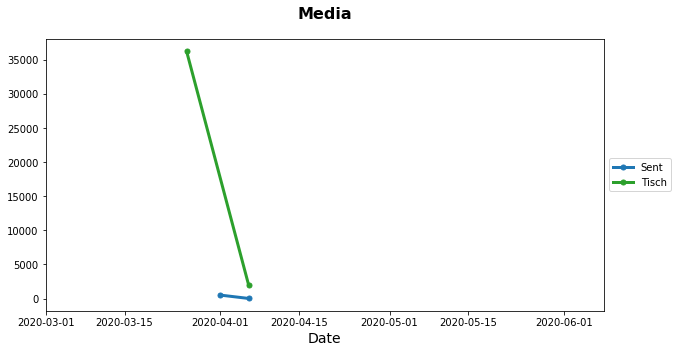

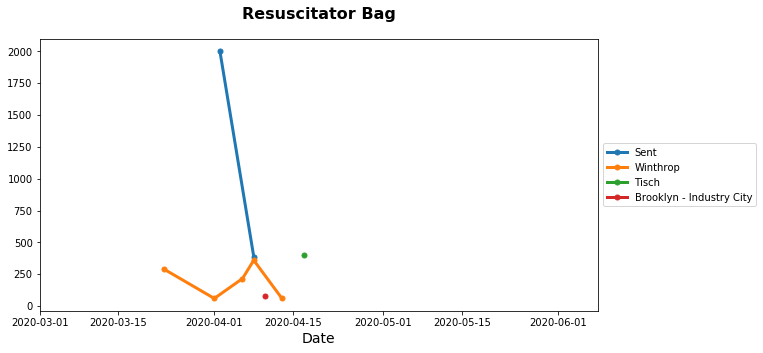

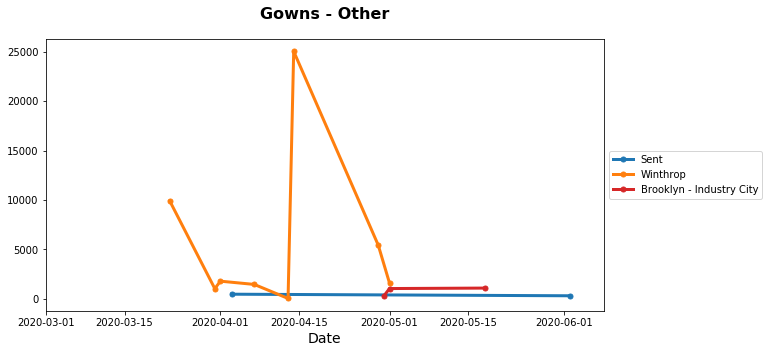

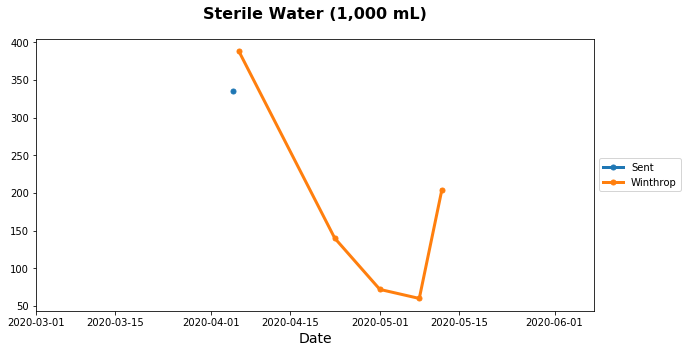

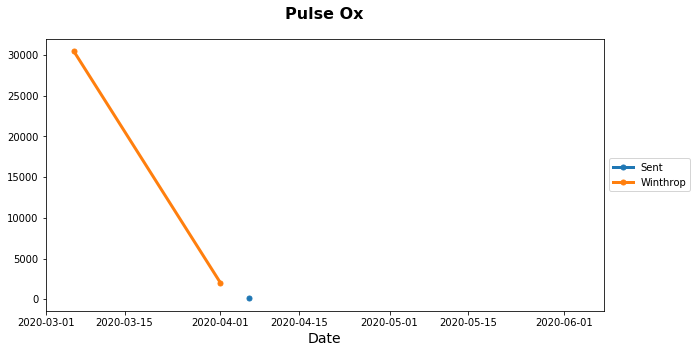

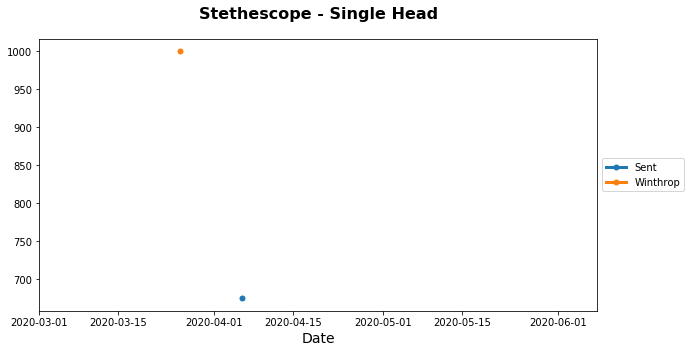

In [19]:
for this_ppe in common_ppe2:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

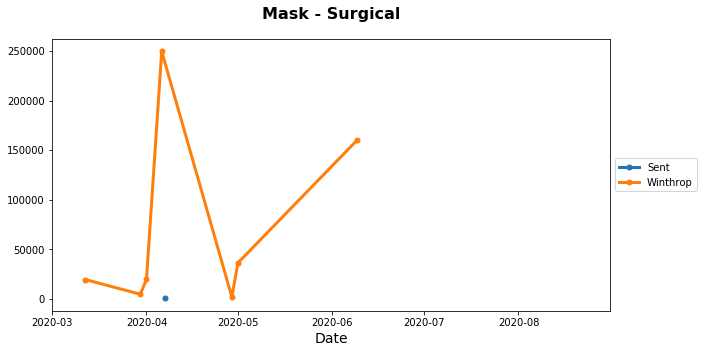

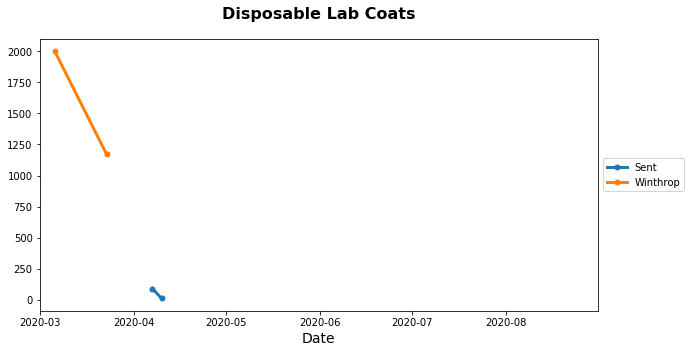

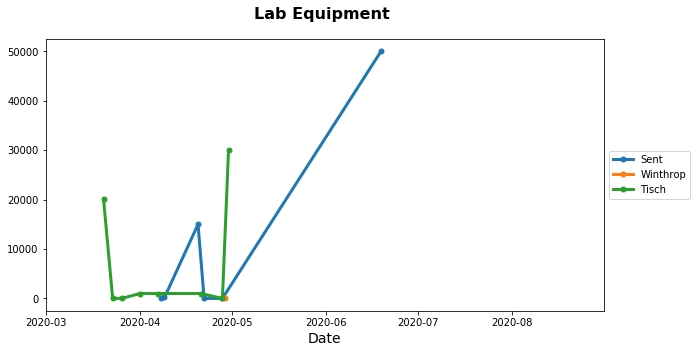

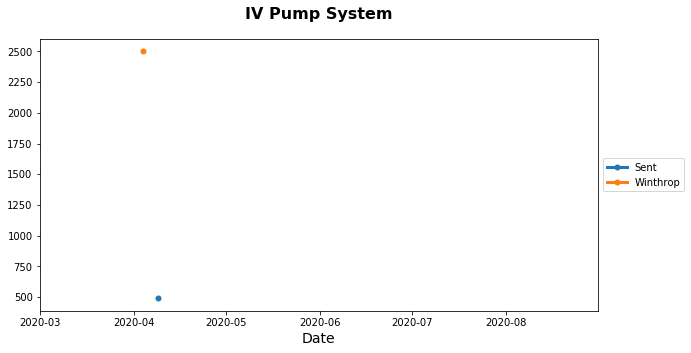

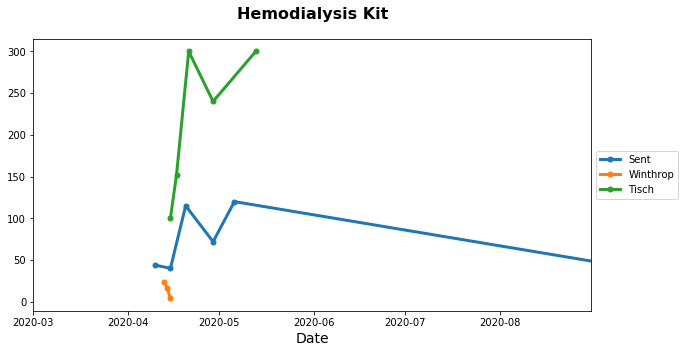

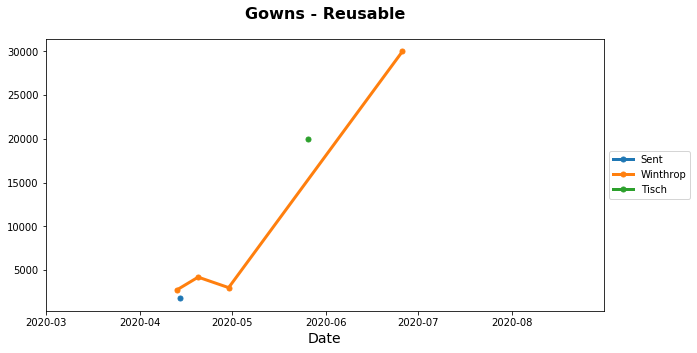

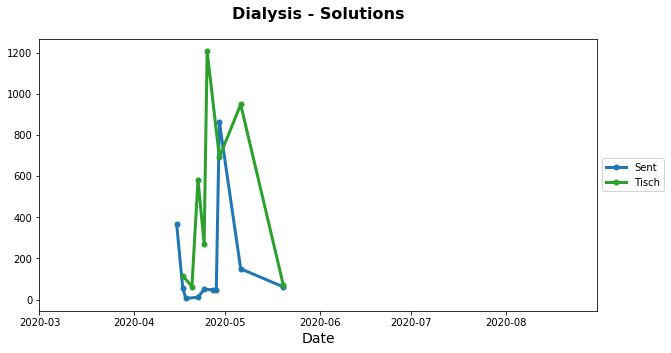

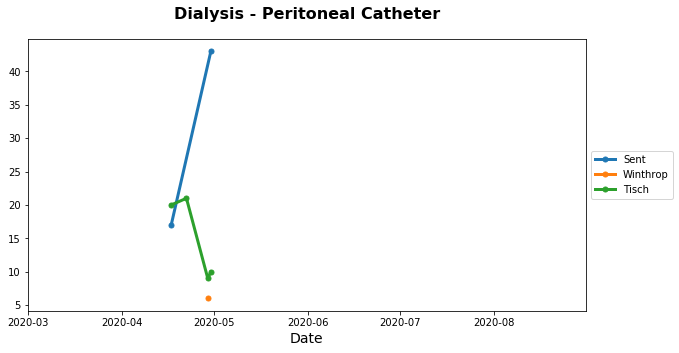

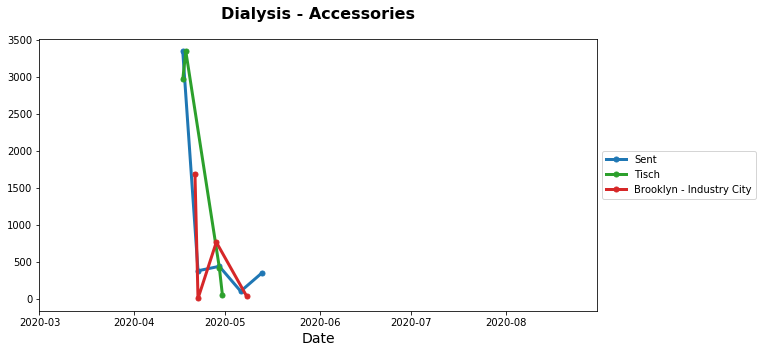

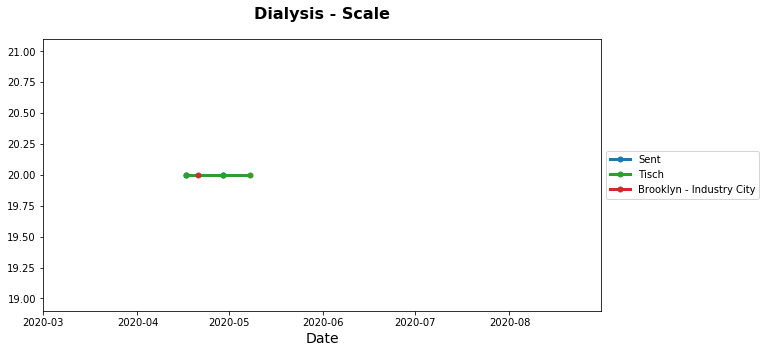

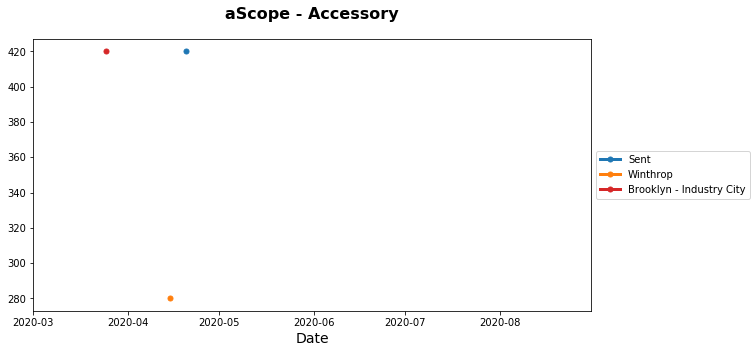

In [20]:
for this_ppe in common_ppe3:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 8, 31)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

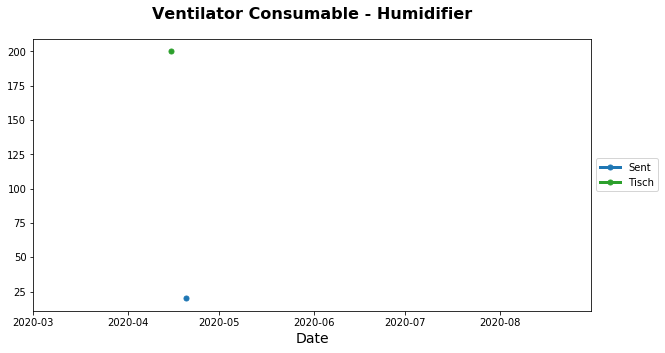

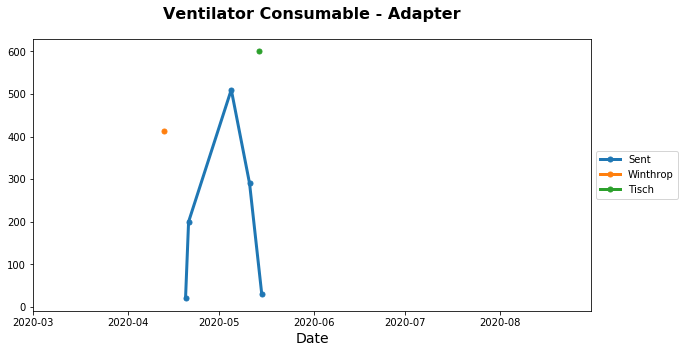

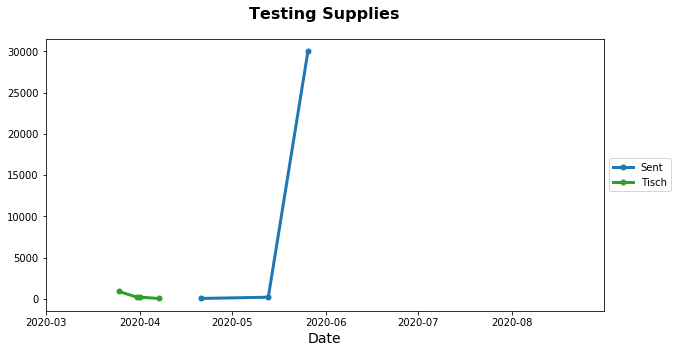

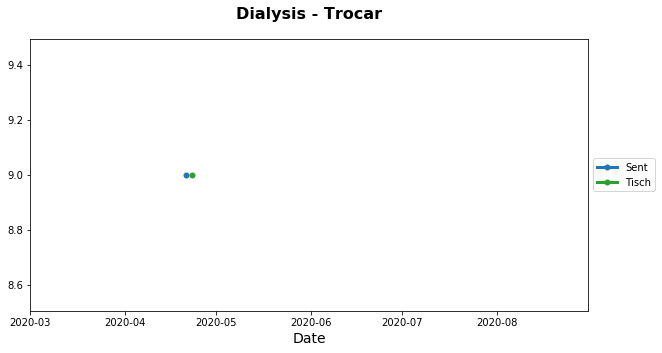

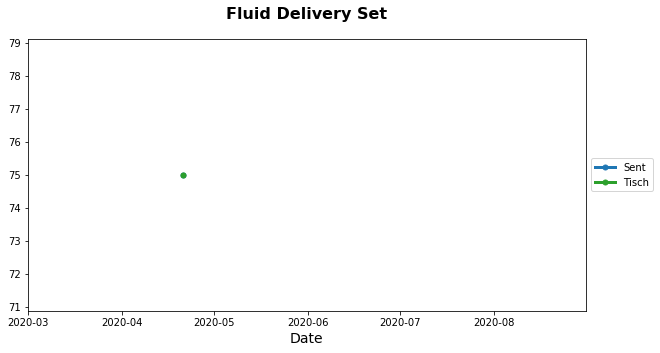

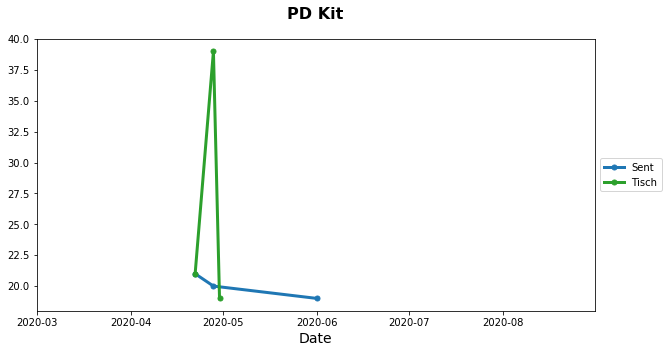

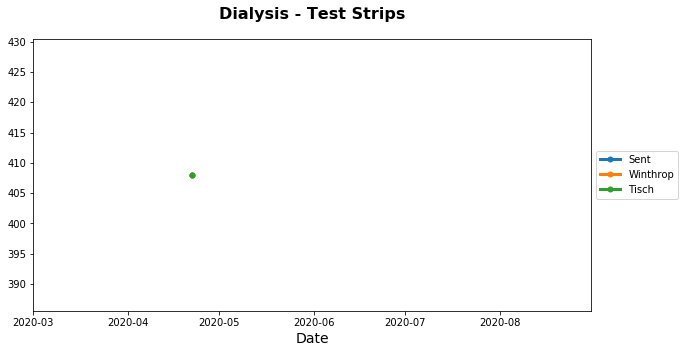

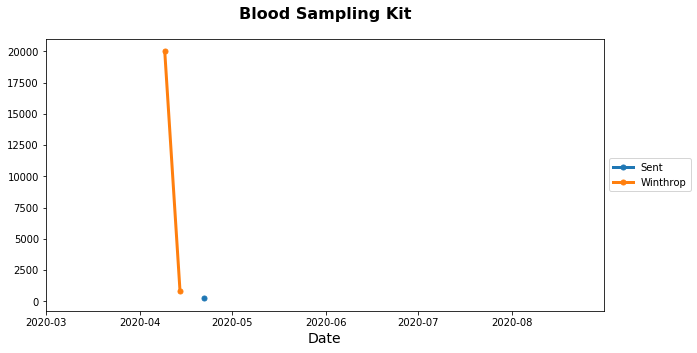

In [21]:
for this_ppe in common_ppe4:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 8, 31)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

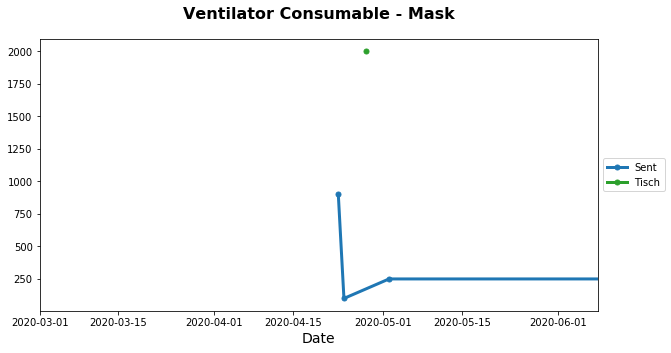

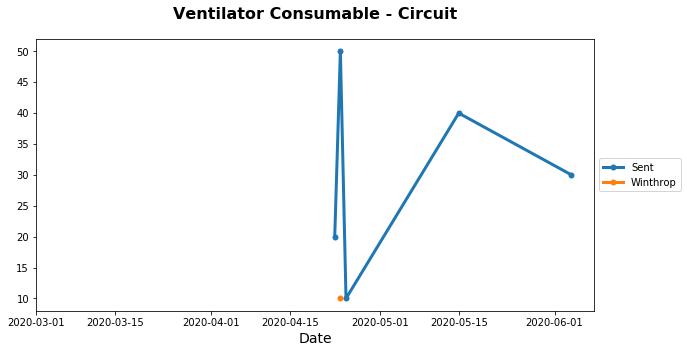

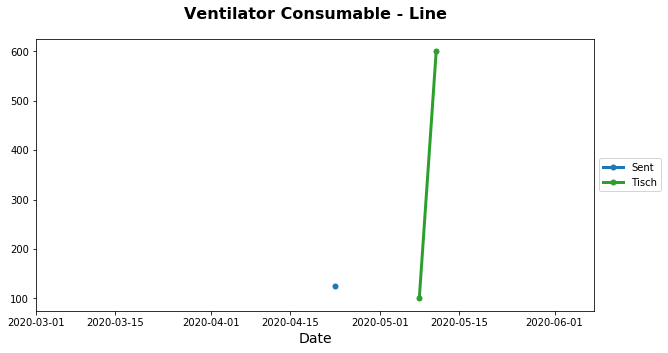

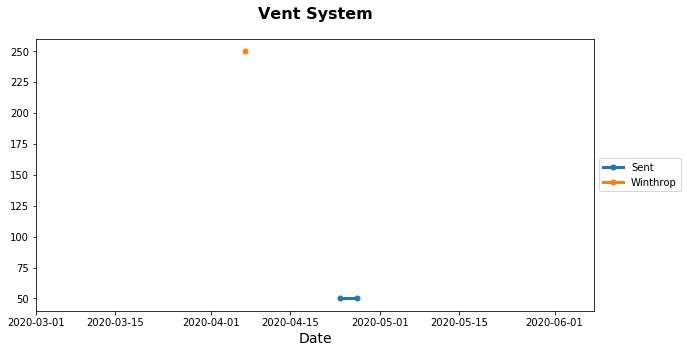

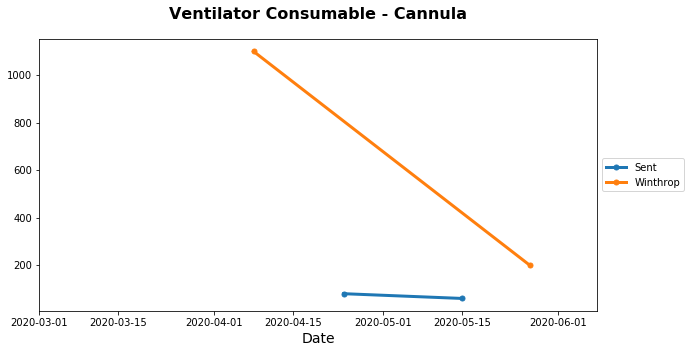

In [22]:
for this_ppe in common_ppe5:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

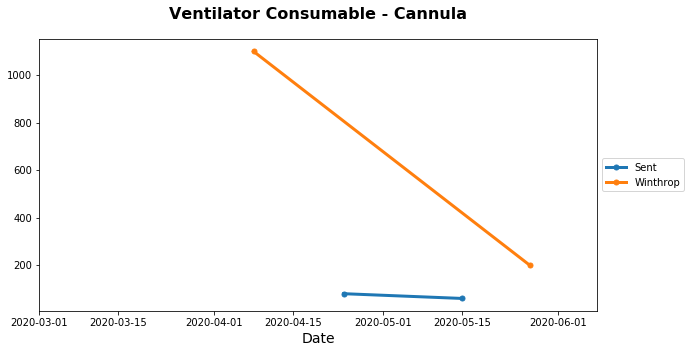

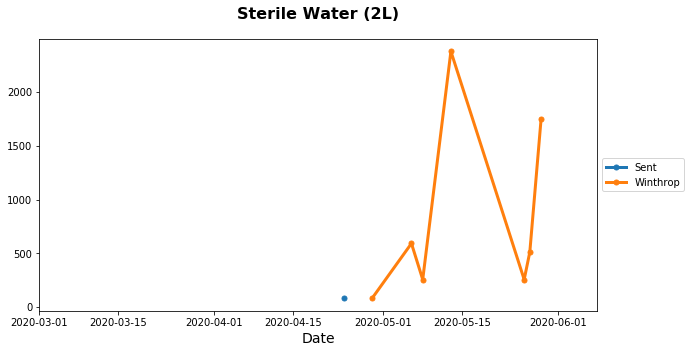

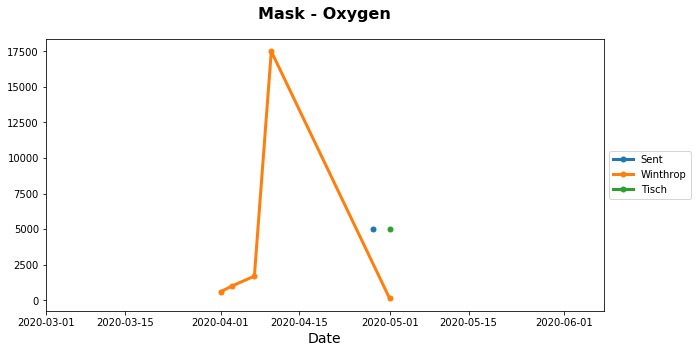

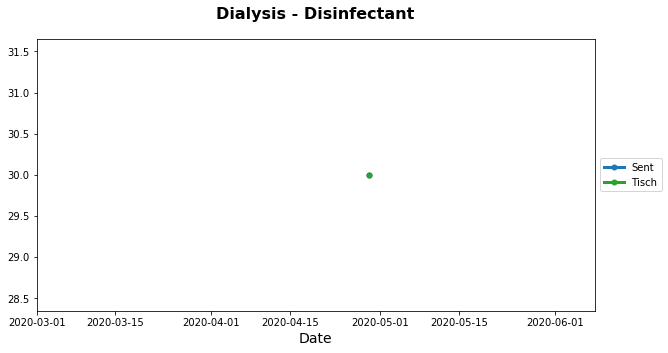

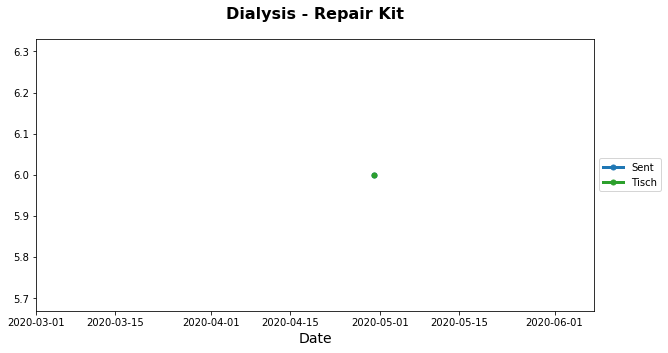

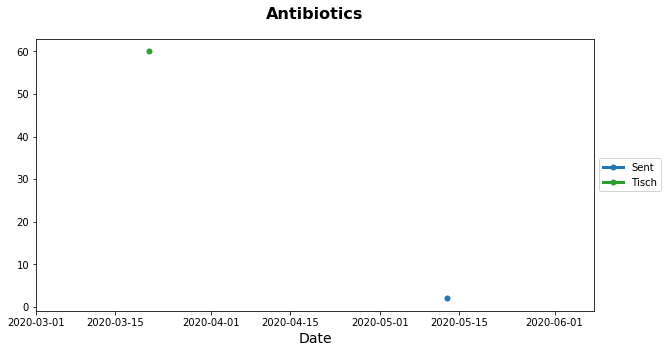

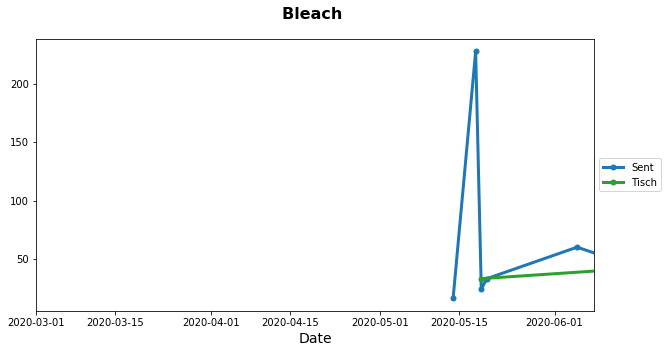

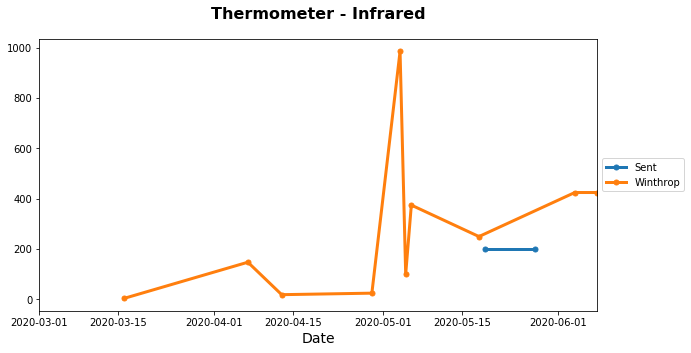

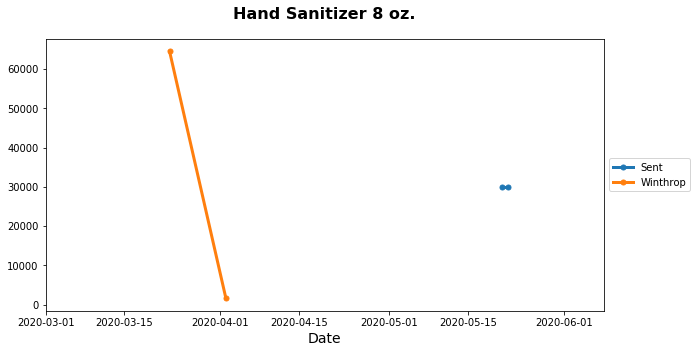

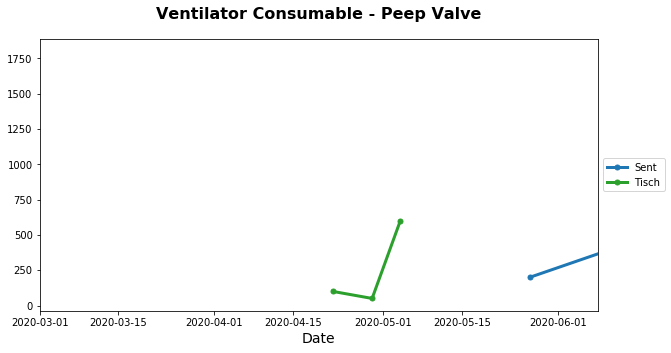

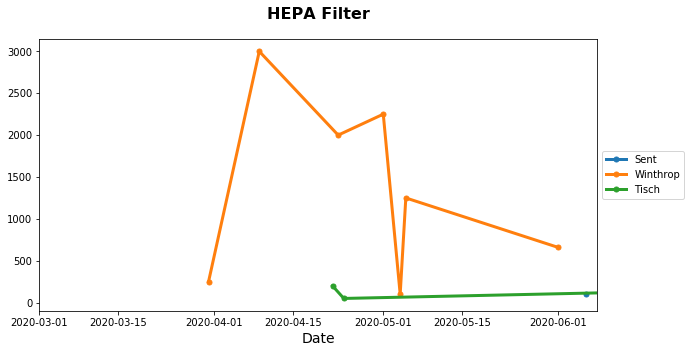

In [23]:
for this_ppe in common_ppe6:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        

In [32]:
df.replace(to_replace = [ 'Mask - CPAP / BIPAP', 'Mask - Surgical', 'Mask - N-95 (Fit Tested)', 'Mask - Procedure Ear Loop', 'Mask - N-95 (Non-Fit Tested)', 'Mask - Anesthesia', 'Mask - Delta Plus', 'Mask - Delta Plus Alternative' , 'Mask - Reusable Respirator', 'Mask - Oxygen', 'Mask - Reusable', 'Mask - Reusable Respirator (M)', 
'Mask - Reusable Respirator (S)', 'Mask - Reusable Respirator (L)', 'Mask - Pediatric' ], value = "Mask", inplace=True)
df.replace(to_replace = [ 'Gowns - Isolation', 'Gowns - Other', 'Gowns - Reusable'], value = "Gowns", inplace=True)
df.replace(to_replace = [ 'Thermometer - Digital Disposable', 'Thermometer - Infrared', 'Thermometer - Probe Cover', 'Thermometer - Tempa-Dot Oral', 'Thermometer - Standard', 'Thermometer - Temple Touch'], value = "Thermometer", inplace=True)
df.replace(to_replace = [ 'Dialysis - Solutions', 'Dialysis - Accessories', 'Dialysis - Scale', 'Dialysis - Peritoneal Catheter', 'Dialysis - Test Strips', 'Thermometer - Temple Touch', 'Dialysis - Trocar', 'Dialysis - Repair Kit', 'Dialysis - Disinfectant'], value = "Dialysis", inplace=True)
df.replace(to_replace = [ 'Wipes - Quat', 'Wipes - Other', 'Wipes - Alcohol', 'Wipes - Bleach'], value = "Wipes", inplace=True)
df.replace(to_replace = [ 'Hand Sanitizer ≤ 2.0 oz.', 'Hand Sanitizer 8 oz.', 'Hand Sanitizer > 8 oz.'], value = "Hand Sanitizer", inplace=True)
df.replace(to_replace = [ 'Ventilator Consumable - Adaptor', 'Ventilator Consumable - Cannula', 'Ventilator Consumable - Catheter', 'Ventilator Consumable - Circuit' , 'Ventilator Consumable - Filter', 'Ventilator Consumable - Humidifier', 'Ventilator Consumable - Mask', 'Ventilator Consumable - Kit', 'Ventilator Consumable - Line', 'Ventilator Consumable - Suction', 'Ventilator Consumable - Probe', 'Ventilator Consumable - Probe', 'Ventilator Consumable - Peep Valve', 'Ventilator Consumable - Tubing Connector', 'Ventilator Consumable - Nebulizer Connector Adapter'], value = "Ventilator Consumable", inplace=True)


combined_ppe = ['Mask', 'Gowns', 'Thermometer', 'Dialysis', 'Wipes', 'Hand Sanitizer', 'Ventilator Consumable']

In [33]:
Sent_ppe = ((df.groupby('Ship-to-Location')).get_group('Sent'))['Product Category'].unique()
Winthrop_ppe = ((df.groupby('Ship-to-Location')).get_group('Winthrop'))['Product Category'].unique()
Brooklyn_ppe = ((df.groupby('Ship-to-Location')).get_group('Brooklyn - Industry City'))['Product Category'].unique()
Tisch_ppe = ((df.groupby('Ship-to-Location')).get_group('Tisch'))['Product Category'].unique()

loc_ppe = [Sent_ppe, Winthrop_ppe, Brooklyn_ppe, Tisch_ppe]

common_ppe = []
for this_ppe_series in loc_ppe: 
    for this_ppe in this_ppe_series: 
        if this_ppe in Sent_ppe and ((this_ppe in Winthrop_ppe) or (this_ppe in Brooklyn_ppe) or (this_ppe in Tisch_ppe)): 
            if not (this_ppe in common_ppe): 
                common_ppe.append(this_ppe)


    



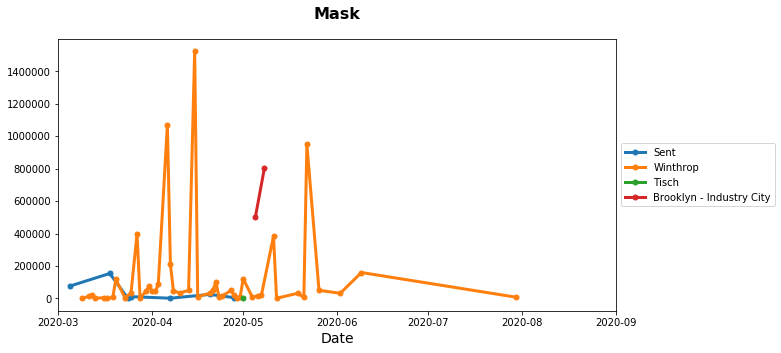

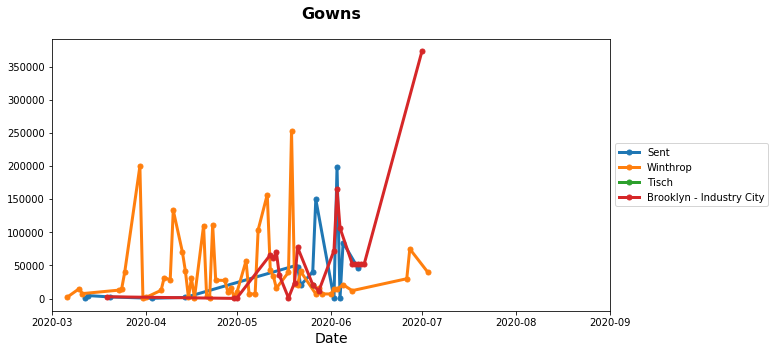

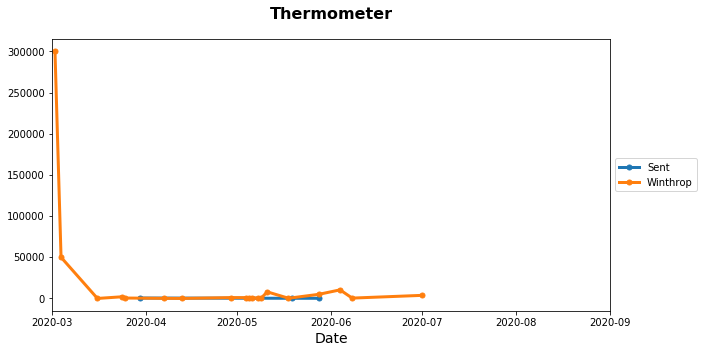

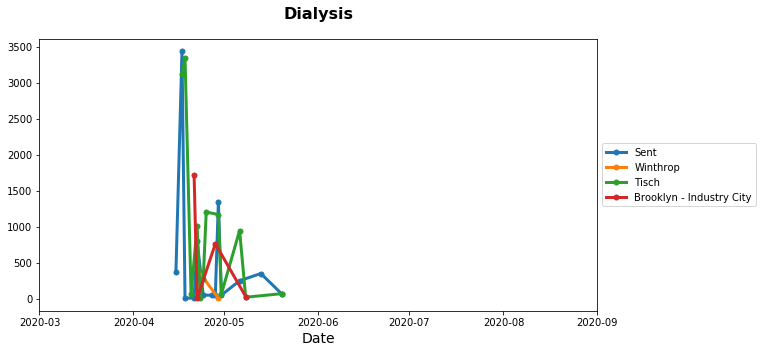

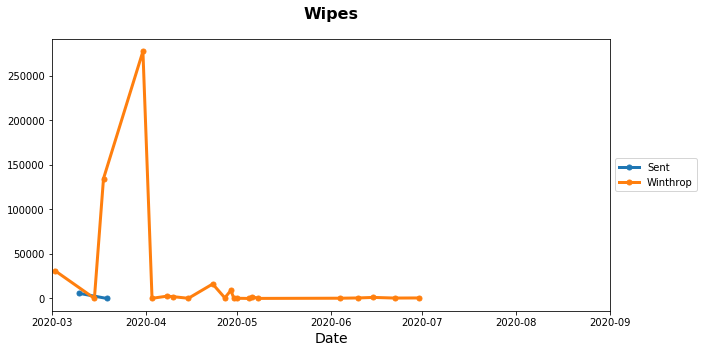

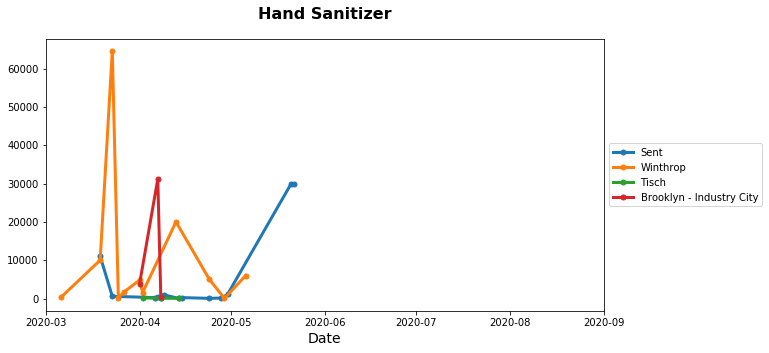

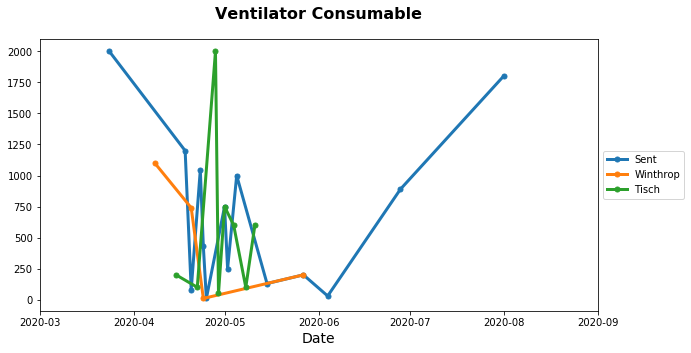

In [34]:
for this_ppe in combined_ppe:
    df_ppe_groups = df.groupby('Product Category')
    locations = ["Winthrop", "Brooklyn - Industry City", "Tisch", "Sent"]

    stored_sent_df = pd.DataFrame()
    
    if this_ppe in Sent_ppe: 
        sent_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')['Estimated Delivery Date'].unique()
    if this_ppe in Winthrop_ppe: 
        win_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')['Estimated Delivery Date'].unique()
    if this_ppe in Tisch_ppe: 
        tisch_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')['Estimated Delivery Date'].unique()
    if this_ppe in Brooklyn_ppe: 
        brook_dates =((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')['Estimated Delivery Date'].unique()

    
    sent_label = 'Sent Amnt'
    sent_dates_label = 'Sent Dates'
    win_label = 'Winthrop Amnt'
    win_dates_label = 'Winthrop Dates'
    tisch_label = 'Tisch Amnt'
    tisch_dates_label = 'Tisch Dates'
    brook_label = 'Brooklyn - Industry City Amnt'
    brook_dates_label = 'Brooklyn - Industry City Dates'
    
    count = 0
    if this_ppe in Sent_ppe: 
        for each_day in sent_dates:
            stored_sent_df.at[count, sent_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Sent')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, sent_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Winthrop_ppe: 
        for each_day in win_dates:
            stored_sent_df.at[count, win_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Winthrop')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, win_label] = day_value
            count += 1
    
    count = 0
    if this_ppe in Tisch_ppe: 
        for each_day in tisch_dates: 
            stored_sent_df.at[count, tisch_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Tisch')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, tisch_label] = day_value
            count += 1
    
    count = 0  
    if this_ppe in Brooklyn_ppe: 
        for each_day in brook_dates: 
            stored_sent_df.at[count, brook_dates_label] = each_day
            this_group = ((df_ppe_groups.get_group(this_ppe)).groupby('Ship-to-Location')).get_group('Brooklyn - Industry City')
            day_value = this_group[this_group['Estimated Delivery Date']==each_day]['QTY Ordered in EA'].sum()
            stored_sent_df.at[count, brook_label] = day_value
            count += 1

    
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    palette = plt.get_cmap('tab10')
    
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 9, 1)])
    #ax.set_ylim(0, 1200)
        
    plt.title(this_ppe, fontsize=16, pad=20, fontweight='bold')
    if this_ppe in Sent_ppe: 
        ax.plot(sent_dates_label, sent_label, data=stored_sent_df, color=palette(0), linewidth=3, marker = '.', ms = 10,label='Sent')
    if this_ppe in Winthrop_ppe:
        ax.plot(win_dates_label, win_label, data=stored_sent_df, color=palette(1), linewidth=3, marker = '.', ms = 10,label= 'Winthrop')
    if this_ppe in Tisch_ppe:
        ax.plot(tisch_dates_label, tisch_label, data=stored_sent_df, color=palette(2), linewidth=3, marker = '.', ms = 10,label= 'Tisch')
    if this_ppe in Brooklyn_ppe: 
        ax.plot(brook_dates_label, brook_label, data=stored_sent_df, color=palette(3), linewidth=3, marker = '.', ms = 10, label= 'Brooklyn - Industry City')

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stored_sent_df.iloc[0:0]        
    
        